<a href="https://colab.research.google.com/github/duaneywadey/Google-Colab-Notebooks/blob/main/PANCardDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from skimage.metrics import structural_similarity
import imutils
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import requests

In [2]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [3]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card-300x200.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream=True).raw)

In [4]:
# File format of the source file

print("Original image format: ", original.format)
print("Tampered image format: ", tampered.format)

Original image format:  JPEG
Tampered image format:  PNG


In [5]:
# Image size

print("Original image size: ", original.size)
print("Tampered image size: ", tampered.size)

Original image size:  (300, 200)
Tampered image size:  (282, 179)


In [6]:
# Resize original card image 

original = original.resize((250, 160))
print(original.size)
original.save('pan_card_tampering/image/original.png')

# Resize tampered card image 
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


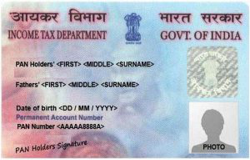

In [7]:
original

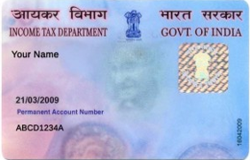

In [8]:
tampered

In [9]:
original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

In [10]:
# Converting the images to grayscale; Colored images are too complex because they  have three channels while grayscale only has one

original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [36]:
# Finding the structural similarity index between the two images to ensure different images are returned. 

(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 25).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.3270528170447926


In [12]:
# Calculating thresholds and contours

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


In [38]:
# Looping over the contours
for c in cnts:
  # Applying the contours on image
  (x, y, w, h) = cv2.boundingRect(c)
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
  cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

Original format image


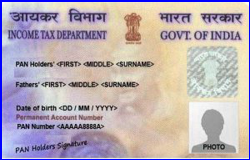

In [34]:
# Display original image with contour
print("Original format image")
Image.fromarray(original)


Tampered image


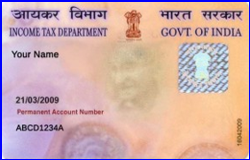

In [35]:
# Display tampered image with contour
print("Tampered image")
Image.fromarray(tampered)

Different Image


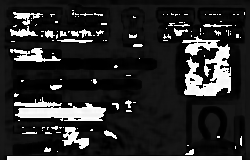

In [39]:
print('Different Image')
Image.fromarray(diff)

Threshold Image


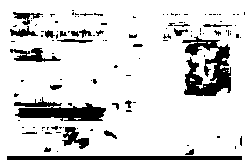

In [40]:
print('Threshold Image')
Image.fromarray(thresh)